# Worksheet: Regression II: linear regression

This worksheet covers the [Regression II: linear regression](https://datasciencebook.ca/regression2.html) chapter of the online textbook, which also lists the learning objectives for this worksheet. You should read the textbook chapter before attempting this worksheet. 

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Warm-up Questions

Here are some warm-up questions on the topic of multiple regression to get you thinking before we jump into data analysis. The course readings should help you answer these.

**Question 1.0** Multiple Choice: 
<br> {points: 1}

In multivariate k-nn regression with one outcome/target variable and two predictor variables, the predictions take the form of what shape?

A. a flat plane

B. a wiggly/flexible plane

C. A straight line

D. a wiggly/flexible line

E. a 4D hyperplane

F. a 4D wiggly/flexible hyperplane

Save the letter of the answer you think is correct to a variable named `answer1.0`. Make sure you put quotations around the letter and pay attention to case.

In [4]:
# your code here
answer1.0<-"B"# No Answer - remove if you provide an answer

In [5]:
library(digest)
stopifnot("type of answer1.0 is not character"= setequal(digest(paste(toString(class(answer1.0)), "c1dca")), "0062368865d313b1d9a0758736981e96"))
stopifnot("length of answer1.0 is not correct"= setequal(digest(paste(toString(length(answer1.0)), "c1dca")), "0b9103cc5a6d5362898cda5f7da0cd1f"))
stopifnot("value of answer1.0 is not correct"= setequal(digest(paste(toString(tolower(answer1.0)), "c1dca")), "cfeaebac99f01978e387bb024cdc6d11"))
stopifnot("letters in string value of answer1.0 are correct but case is not correct"= setequal(digest(paste(toString(answer1.0), "c1dca")), "6bfc86aa847ff4157dd3ba4de5012220"))

print('Success!')

[1] "Success!"


**Question 1.1** Multiple Choice: 
<br> {points: 1}

In simple linear regression with one outcome/target variable and one predictor variable, the predictions take the form of what shape?

A. a flat plane

B. a wiggly/flexible plane

C. A straight line

D. a wiggly/flexible line

E. a 4D hyperplane

F. a 4D wiggly/flexible hyperplane

Save the letter of the answer you think is correct to a variable named `answer1.1`. Make sure you put quotations around the letter and pay attention to case.

In [12]:
# your code here
answer1.1<-"C"# No Answer - remove if you provide an answer

In [13]:
library(digest)
stopifnot("type of answer1.1 is not character"= setequal(digest(paste(toString(class(answer1.1)), "9f35e")), "0f1e7877308258f0f4d1265b701d5e1e"))
stopifnot("length of answer1.1 is not correct"= setequal(digest(paste(toString(length(answer1.1)), "9f35e")), "96556f84d0cfd3c5304b670e691a10af"))
stopifnot("value of answer1.1 is not correct"= setequal(digest(paste(toString(tolower(answer1.1)), "9f35e")), "0afb28f4f1c05ad02549badb853886e1"))
stopifnot("letters in string value of answer1.1 are correct but case is not correct"= setequal(digest(paste(toString(answer1.1), "9f35e")), "5f72ad18f4b91281489a09abd242d8f6"))

print('Success!')

[1] "Success!"


**Question 1.2** Multiple Choice: 
<br> {points: 1}

In multiple linear regression with one outcome/target variable and two predictor variables, the predictions take the form of what shape?

A. a flat plane

B. a wiggly/flexible plane

C. A straight line

D. a wiggly/flexible line

E. a 4D hyperplane

F. a 4D wiggly/flexible hyperplane

Save the letter of the answer you think is correct to a variable named `answer1.2`. Make sure you put quotations around the letter and pay attention to case.

In [14]:
# your code here
answer1.2<-"A"# No Answer - remove if you provide an answer

In [15]:
library(digest)
stopifnot("type of answer1.2 is not character"= setequal(digest(paste(toString(class(answer1.2)), "962df")), "edcf1b7f6d8db50d0ef71fe87b9ff265"))
stopifnot("length of answer1.2 is not correct"= setequal(digest(paste(toString(length(answer1.2)), "962df")), "7f043cb37eae566922f1d03b91a3eeff"))
stopifnot("value of answer1.2 is not correct"= setequal(digest(paste(toString(tolower(answer1.2)), "962df")), "63b747cced3f34f794ea789c80a52f56"))
stopifnot("letters in string value of answer1.2 are correct but case is not correct"= setequal(digest(paste(toString(answer1.2), "962df")), "8ead807c82b5f9abb9a8d8440d856001"))

print('Success!')

[1] "Success!"


### Understanding Simple Linear Regression

Consider this small and simple dataset: 

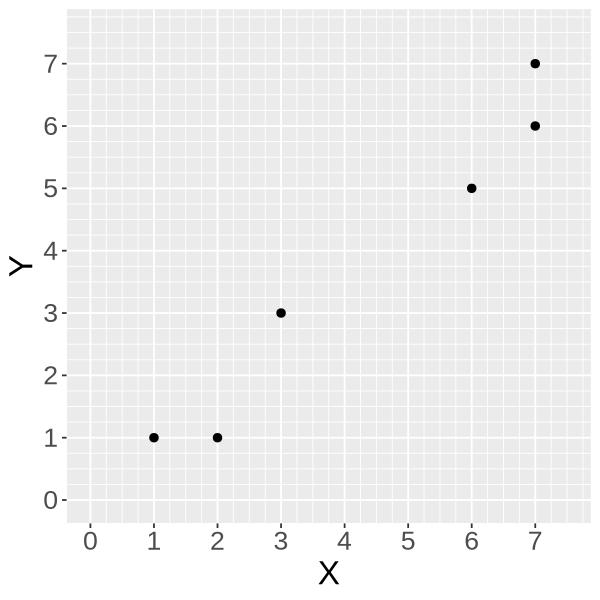

In [16]:
## run this code 
simple_data  <- tibble(X = c(1, 2, 3, 6, 7, 7),
               Y = c(1, 1, 3, 5, 7, 6))
options(repr.plot.width = 5, repr.plot.height = 5)
base <- ggplot(simple_data, aes(x = X, y = Y)) +
    geom_point(size = 2) +
    scale_x_continuous(limits = c(0, 7.5), breaks = seq(0, 8), minor_breaks = seq(0, 8, 0.25)) +
    scale_y_continuous(limits = c(0, 7.5), breaks = seq(0, 8), minor_breaks = seq(0, 8, 0.25)) +
    theme(text = element_text(size = 20))
base 

Now consider these three **potential** lines we could fit for the same dataset:

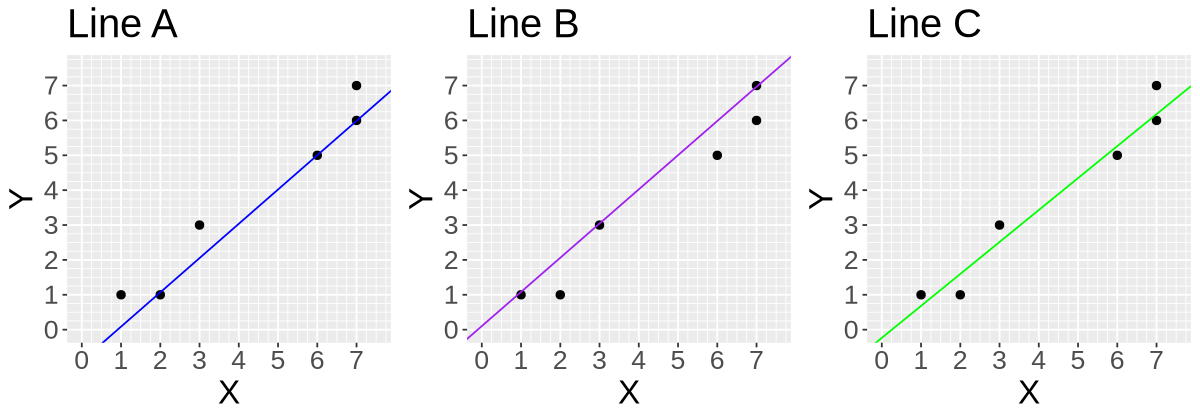

In [17]:
options(repr.plot.height = 3.5, repr.plot.width = 10)
line_a <- base +
    ggtitle("Line A") +
    geom_abline(intercept = -0.897, slope = 0.9834, color = "blue") +
    theme(text = element_text(size = 20))
line_b <- base +
    ggtitle("Line B") +
    geom_abline(intercept = 0.1022, slope = 0.9804, color = "purple") +
    theme(text = element_text(size = 20))
line_c <- base +
    ggtitle("Line C") +
    geom_abline(intercept = -0.2347, slope = 0.9164, color = "green") +
    theme(text = element_text(size = 20))
plot_grid(line_a, line_b, line_c, ncol = 3)

**Question 2.0**
<br> {points: 1}

Use the graph below titled "Line A" to roughly calculate the average squared vertical distance between the points and the blue line. Read values of the graph to a **precision of 0.25** (e.g. 1, 1.25, 1.5, 1.75, 2). Save your answer to a variable named `answer2.0`. 

*We reprint the plot for you in a larger size to make it easier to estimate the locations on the graph.*

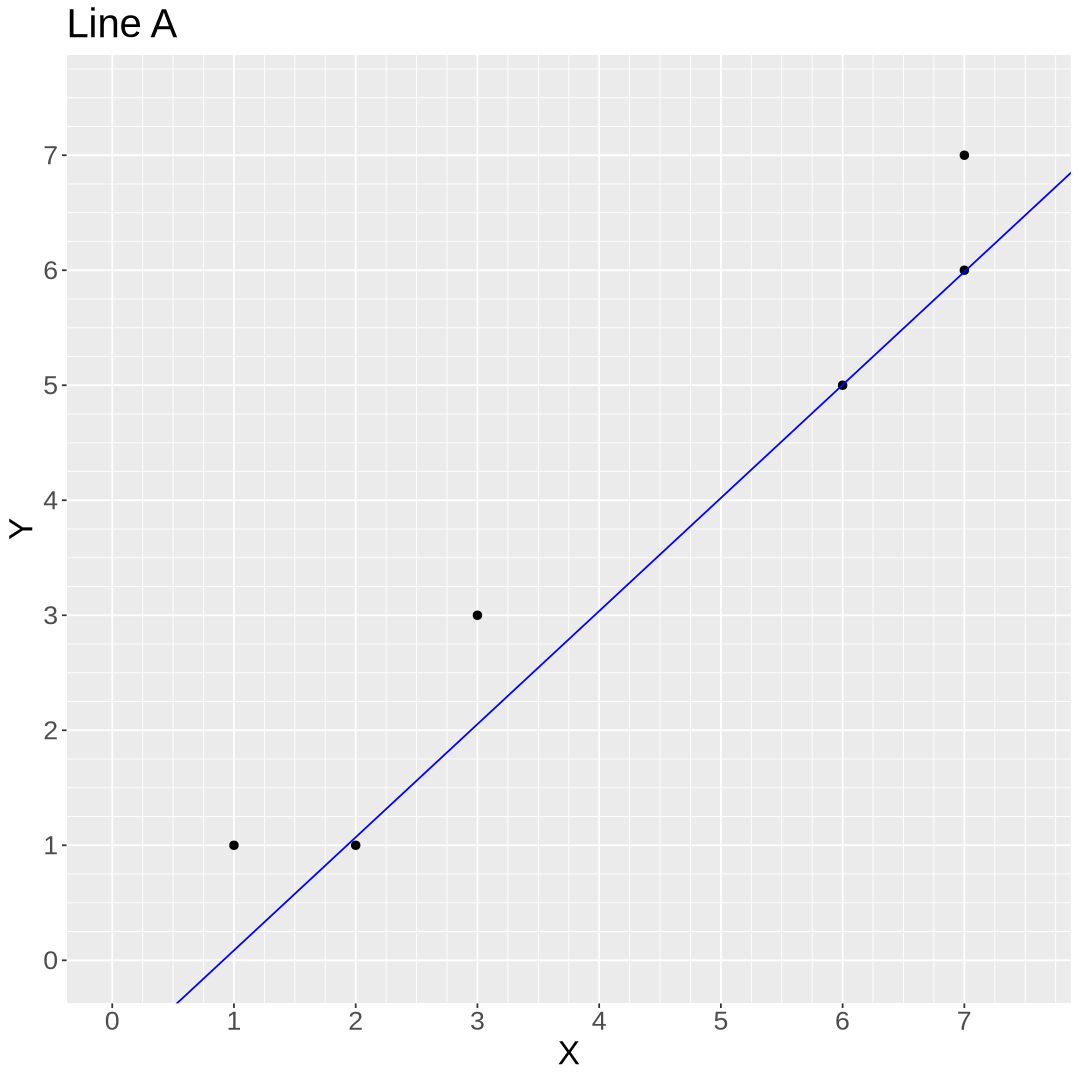

In [18]:
#run this code
options(repr.plot.width = 9, repr.plot.height = 9)
line_a

In [28]:
# your code here
answer2.0<-0.5
 # No Answer - remove if you provide an answer
answer2.0

[1] 0.5

In [29]:
library(digest)
stopifnot("type of round(answer2.0, 2) is not numeric"= setequal(digest(paste(toString(class(round(answer2.0, 2))), "c421d")), "60b51a2c6c08e835154fbd3a85eafb69"))
stopifnot("value of round(answer2.0, 2) is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(round(answer2.0, 2), 2)), "c421d")), "b5753e2357b9e3c512b25411a68fdd61"))
stopifnot("length of round(answer2.0, 2) is not correct"= setequal(digest(paste(toString(length(round(answer2.0, 2))), "c421d")), "aae0eb53bb949b3c6130cd8e6a07f130"))
stopifnot("values of round(answer2.0, 2) are not correct"= setequal(digest(paste(toString(sort(round(round(answer2.0, 2), 2))), "c421d")), "b5753e2357b9e3c512b25411a68fdd61"))

print('Success!')

[1] "Success!"


**Question 2.1**
<br> {points: 1}

Use the graph titled "Line B" to roughly calculate the average squared vertical distance between the points and the purple line. Read values of the graph to a **precision of 0.25** (e.g. 1, 1.25, 1.5, 1.75, 2). Save your answer to a variable named `answer2.1`. 

*We reprint the plot for you in a larger size to make it easier to estimate the locations on the graph.*

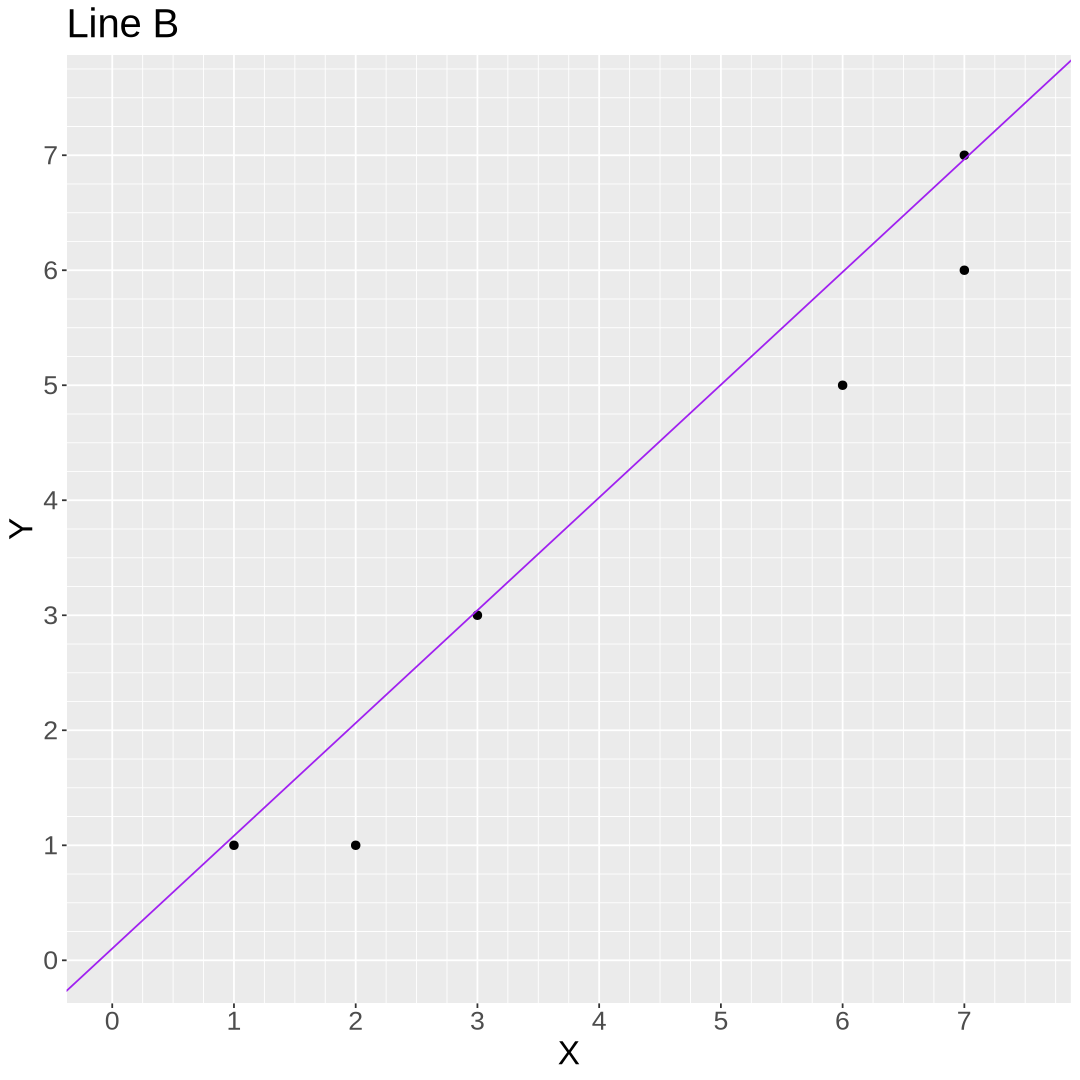

In [32]:
options(repr.plot.width = 9, repr.plot.height = 9)
line_b

In [30]:
# your code here
# No Answer - remove if you provide an answer
answer2.1<-0.5

In [31]:
library(digest)
stopifnot("type of round(answer2.1, 2) is not numeric"= setequal(digest(paste(toString(class(round(answer2.1, 2))), "26b01")), "73fe4642b108c0c6fb9e31c5638f220d"))
stopifnot("value of round(answer2.1, 2) is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(round(answer2.1, 2), 2)), "26b01")), "7450db9b8c0f6a7562640316dfa0bc01"))
stopifnot("length of round(answer2.1, 2) is not correct"= setequal(digest(paste(toString(length(round(answer2.1, 2))), "26b01")), "371c4d802308bc29de8f5243443264fb"))
stopifnot("values of round(answer2.1, 2) are not correct"= setequal(digest(paste(toString(sort(round(round(answer2.1, 2), 2))), "26b01")), "7450db9b8c0f6a7562640316dfa0bc01"))

print('Success!')

[1] "Success!"


**Question 2.2** 
<br> {points: 1}

Use the graph titled "Line C" to roughly calculate the average squared vertical distance between the points and the green line. Read values of the graph to a **precision of 0.25** (e.g. 1, 1.25, 1.5, 1.75, 2). Save your answer to a variable named `answer2.2`. 

*We reprint the plot for you in a larger size to make it easier to estimate the locations on the graph.*

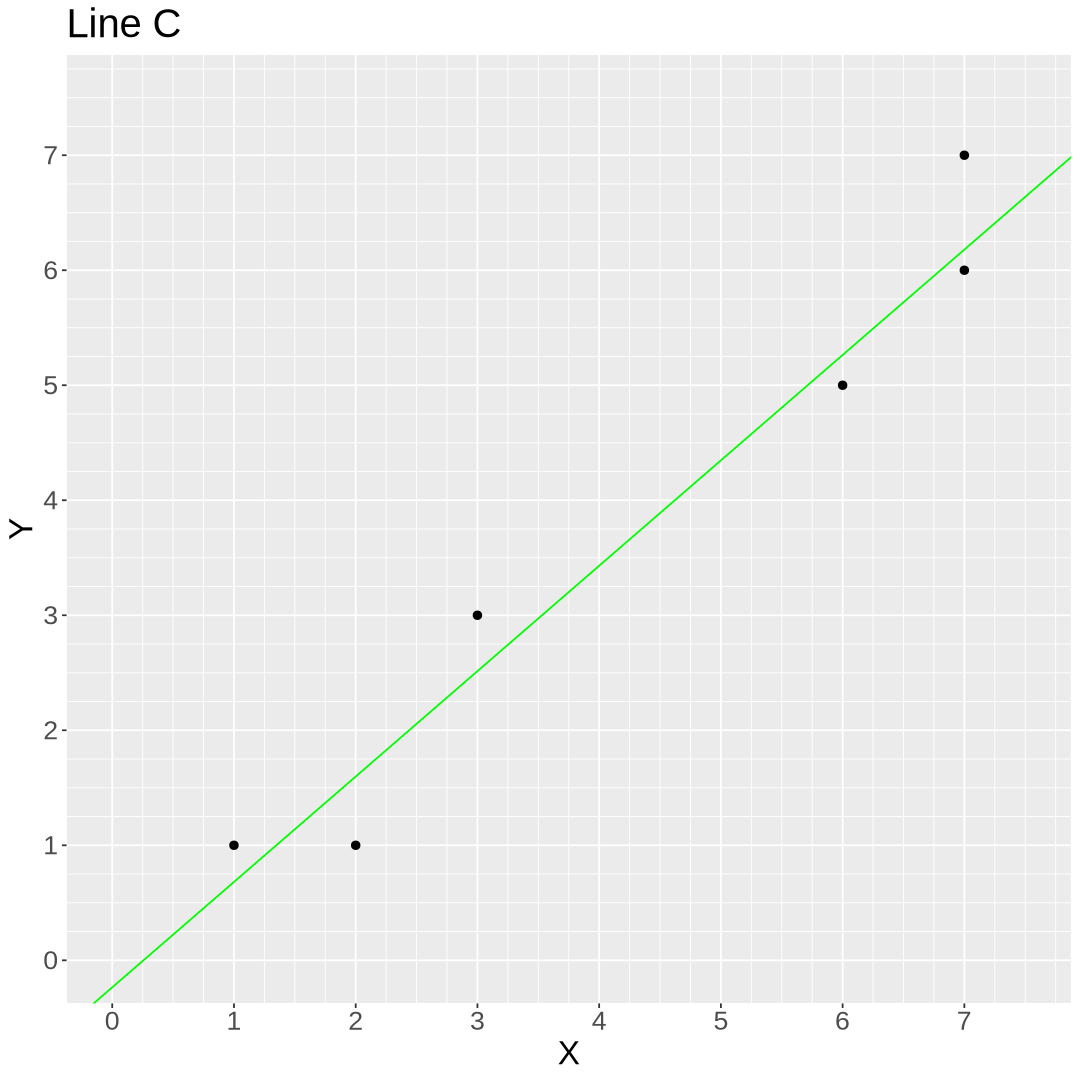

In [27]:
options(repr.plot.width = 9, repr.plot.height = 9)
line_c

In [25]:
# your code here
answer2.2<-0.21

In [26]:
library(digest)
stopifnot("type of round(answer2.2) is not numeric"= setequal(digest(paste(toString(class(round(answer2.2))), "b6f4e")), "a9ff9b86408482a29adf68825849a2fc"))
stopifnot("value of round(answer2.2) is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(round(answer2.2), 2)), "b6f4e")), "10d782e505a4d946c033ae64a61f01d5"))
stopifnot("length of round(answer2.2) is not correct"= setequal(digest(paste(toString(length(round(answer2.2))), "b6f4e")), "787c683899af26cd449f1d7825f44c94"))
stopifnot("values of round(answer2.2) are not correct"= setequal(digest(paste(toString(sort(round(round(answer2.2), 2))), "b6f4e")), "10d782e505a4d946c033ae64a61f01d5"))

print('Success!')

[1] "Success!"


**Question 2.3**
<br> {points: 1}

Based on your calculations above, which line would linear regression by ordinary least squares choose given our small and simple dataset? Line A, B or C? Assign the letter that corresponds the line to a variable named `answer2.3`. Make sure you put quotations around the letter and pay attention to case.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer2.3 is not character"= setequal(digest(paste(toString(class(answer2.3)), "6e40a")), "31581ca444e3e522b6799848cc7d57b4"))
stopifnot("length of answer2.3 is not correct"= setequal(digest(paste(toString(length(answer2.3)), "6e40a")), "46ae7667ffe66fc339f6d8552bf49ec5"))
stopifnot("value of answer2.3 is not correct"= setequal(digest(paste(toString(tolower(answer2.3)), "6e40a")), "c3b8ffae6f3f1f2abc0c0e8c62432cc8"))
stopifnot("letters in string value of answer2.3 are correct but case is not correct"= setequal(digest(paste(toString(answer2.3), "6e40a")), "7dac3ef201af4beeadb8007c86d45e40"))

print('Success!')

## Marathon Training Revisited with Linear Regression!

<img src='https://media.giphy.com/media/BDagLpxFIm3SM/giphy.gif' width='400'>

Source: https://media.giphy.com/media/BDagLpxFIm3SM/giphy.gif

Remember our question from last week: what features predict whether athletes will perform better than others? Specifically, we are interested in marathon runners, and looking at how the maximum distance ran per week during training predicts the time it takes a runner to end the race? 

This time around, however, we will analyze the data using simple linear regression rather than $k$-nn regression. In the end, we will compare our results to what we found last week with $k$-nn regression.

**Question 3.0**
<br> {points: 1}

Load the `marathon` data and assign it to an object called `marathon`. 

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer
marathon

In [ ]:
library(digest)
stopifnot("marathon should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon)), "1acc1")), "ae70b371b8f45716725ad6ed47342dfc"))
stopifnot("dimensions of marathon are not correct"= setequal(digest(paste(toString(dim(marathon)), "1acc1")), "b9802a9b3dddfe0ee07a7e2f6e7d0cdc"))
stopifnot("column names of marathon are not correct"= setequal(digest(paste(toString(sort(colnames(marathon))), "1acc1")), "a0d9dead321d7baca4daef454c2ba1e5"))
stopifnot("types of columns in marathon are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon, class)))), "1acc1")), "2b2cd994f5a194a03aa1042b91121b6e"))
stopifnot("values in one or more numerical columns in marathon are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon, is.numeric))) sort(round(sapply(marathon[, sapply(marathon, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "1acc1")), "d6e3e150abbd8e2ff830c3a43e8fddc0"))
stopifnot("values in one or more character columns in marathon are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon, is.character))) sum(sapply(marathon[sapply(marathon, is.character)], function(x) length(unique(x)))) else 0), "1acc1")), "897000072cc9ce82681f2c1dd68b3a00"))
stopifnot("values in one or more factor columns in marathon are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon, is.factor))) sum(sapply(marathon[, sapply(marathon, is.factor)], function(col) length(unique(col)))) else 0), "1acc1")), "897000072cc9ce82681f2c1dd68b3a00"))

print('Success!')

**Question 3.1**
<br> {points: 1}

Similar to what we have done for the last few weeks, we will first split the dataset into the training and testing datasets, using 75% of the original data as the training data. Remember, we will be putting the test dataset away in a 'lock box' that we will comeback to later after we choose our final model. In the `strata` argument of the `initial_split` function, place the variable we are trying to predict. Assign your split dataset to an object named `marathon_split`. 

Assign your training dataset to an object named `marathon_training` and your testing dataset to an object named `marathon_testing`.

In [ ]:
set.seed(2000) # DO NOT CHANGE THIS
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of 'rsplit' %in% class(marathon_split) is not logical"= setequal(digest(paste(toString(class('rsplit' %in% class(marathon_split))), "71ac4")), "870c923565a346b32afd6edd74a1fcc4"))
stopifnot("logical value of 'rsplit' %in% class(marathon_split) is not correct"= setequal(digest(paste(toString('rsplit' %in% class(marathon_split)), "71ac4")), "c128f7d08e1a97bd5d7130fe20bae29f"))

stopifnot("marathon_training should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_training)), "71ac5")), "42de1b199d3ae516182745019109542b"))
stopifnot("dimensions of marathon_training are not correct"= setequal(digest(paste(toString(dim(marathon_training)), "71ac5")), "dba79e5d0afe650395d1750b8bf39259"))
stopifnot("column names of marathon_training are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_training))), "71ac5")), "0cab7459f91e73487ade5163168e4af7"))
stopifnot("types of columns in marathon_training are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_training, class)))), "71ac5")), "42b6d84ea44fe5d15bebb1297ad9326a"))
stopifnot("values in one or more numerical columns in marathon_training are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_training, is.numeric))) sort(round(sapply(marathon_training[, sapply(marathon_training, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "71ac5")), "fa950c5c01ce9c933b6f68f1817b2db9"))
stopifnot("values in one or more character columns in marathon_training are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_training, is.character))) sum(sapply(marathon_training[sapply(marathon_training, is.character)], function(x) length(unique(x)))) else 0), "71ac5")), "30421dcc571f50e1cf88d0ab99a762bb"))
stopifnot("values in one or more factor columns in marathon_training are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_training, is.factor))) sum(sapply(marathon_training[, sapply(marathon_training, is.factor)], function(col) length(unique(col)))) else 0), "71ac5")), "30421dcc571f50e1cf88d0ab99a762bb"))

stopifnot("marathon_testing should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_testing)), "71ac6")), "e04fd132545851d3ea14dd4f5aa6e235"))
stopifnot("dimensions of marathon_testing are not correct"= setequal(digest(paste(toString(dim(marathon_testing)), "71ac6")), "c9610fb3584cf217219e358ef972e7e4"))
stopifnot("column names of marathon_testing are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_testing))), "71ac6")), "22c3445ff5c2cd059b263b6b79f27ab2"))
stopifnot("types of columns in marathon_testing are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_testing, class)))), "71ac6")), "e119200748401e4b4bec40953e8bc6df"))
stopifnot("values in one or more numerical columns in marathon_testing are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_testing, is.numeric))) sort(round(sapply(marathon_testing[, sapply(marathon_testing, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "71ac6")), "3e0e18b649424c4c945ca0145bef2800"))
stopifnot("values in one or more character columns in marathon_testing are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_testing, is.character))) sum(sapply(marathon_testing[sapply(marathon_testing, is.character)], function(x) length(unique(x)))) else 0), "71ac6")), "6b860e416b6e8e441818ec6be5d4995d"))
stopifnot("values in one or more factor columns in marathon_testing are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_testing, is.factor))) sum(sapply(marathon_testing[, sapply(marathon_testing, is.factor)], function(col) length(unique(col)))) else 0), "71ac6")), "6b860e416b6e8e441818ec6be5d4995d"))

print('Success!')

**Question 3.2**
<br> {points: 1}

Using only the observations in the training dataset, create a scatterplot to assess the relationship between race time (`time_hrs`) and maximum distance ran per week during training (`max`). Put `time_hrs` on the y-axis and `max` on the x-axis. Assign this plot to an object called `marathon_eda`. Remember to do whatever is necessary to make this an effective visualization.

In [ ]:
options(repr.plot.height = 8, repr.plot.width = 7)

# your code here
fail() # No Answer - remove if you provide an answer
marathon_eda

In [ ]:
library(digest)
stopifnot("type of plot is not correct (if you are using two types of geoms, try flipping the order of the geom objects!)"= setequal(digest(paste(toString(sapply(seq_len(length(marathon_eda$layers)), function(i) {c(class(marathon_eda$layers[[i]]$geom))[1]})), "11fac")), "4459ab0fafff46beffafd74322e39f33"))
stopifnot("variable x is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(marathon_eda$layers)), function(i) {rlang::get_expr(c(marathon_eda$layers[[i]]$mapping, marathon_eda$mapping)$x)}), as.character))), "11fac")), "ff45305bbbd821a02854aa03e229b841"))
stopifnot("variable y is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(marathon_eda$layers)), function(i) {rlang::get_expr(c(marathon_eda$layers[[i]]$mapping, marathon_eda$mapping)$y)}), as.character))), "11fac")), "63e3299ade73457551067f0c882c5a8c"))
stopifnot("x-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_eda$layers[[1]]$mapping, marathon_eda$mapping)$x)!= marathon_eda$labels$x), "11fac")), "0f8c484bf7bc498eb68af14f6135c7ce"))
stopifnot("y-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_eda$layers[[1]]$mapping, marathon_eda$mapping)$y)!= marathon_eda$labels$y), "11fac")), "0f8c484bf7bc498eb68af14f6135c7ce"))
stopifnot("incorrect colour variable in marathon_eda, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_eda$layers[[1]]$mapping, marathon_eda$mapping)$colour)), "11fac")), "f720d575ebde6c6d0020075d65c620ba"))
stopifnot("incorrect shape variable in marathon_eda, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_eda$layers[[1]]$mapping, marathon_eda$mapping)$shape)), "11fac")), "f720d575ebde6c6d0020075d65c620ba"))
stopifnot("the colour label in marathon_eda is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_eda$layers[[1]]$mapping, marathon_eda$mapping)$colour) != marathon_eda$labels$colour), "11fac")), "f720d575ebde6c6d0020075d65c620ba"))
stopifnot("the shape label in marathon_eda is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(marathon_eda$layers[[1]]$mapping, marathon_eda$mapping)$colour) != marathon_eda$labels$shape), "11fac")), "f720d575ebde6c6d0020075d65c620ba"))
stopifnot("fill variable in marathon_eda is not correct"= setequal(digest(paste(toString(quo_name(marathon_eda$mapping$fill)), "11fac")), "4dd26f2adb5019221d751562ad1605ea"))
stopifnot("fill label in marathon_eda is not informative"= setequal(digest(paste(toString((quo_name(marathon_eda$mapping$fill) != marathon_eda$labels$fill)), "11fac")), "f720d575ebde6c6d0020075d65c620ba"))
stopifnot("position argument in marathon_eda is not correct"= setequal(digest(paste(toString(class(marathon_eda$layers[[1]]$position)[1]), "11fac")), "7bc0a64ae1fbaf25265604c8c06f747f"))

stopifnot("marathon_eda$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_eda$data)), "11fad")), "f45fafe1072c34829ea6fb8e233b9781"))
stopifnot("dimensions of marathon_eda$data are not correct"= setequal(digest(paste(toString(dim(marathon_eda$data)), "11fad")), "1300556bdc994b3feb7c50db1edef550"))
stopifnot("column names of marathon_eda$data are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_eda$data))), "11fad")), "5f03d7c878564320eb15d49ccdbc6adb"))
stopifnot("types of columns in marathon_eda$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_eda$data, class)))), "11fad")), "55d9d03b6a1fdb2d57671eaf35751163"))
stopifnot("values in one or more numerical columns in marathon_eda$data are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_eda$data, is.numeric))) sort(round(sapply(marathon_eda$data[, sapply(marathon_eda$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "11fad")), "1dead0c6529f779942736f60674097c6"))
stopifnot("values in one or more character columns in marathon_eda$data are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_eda$data, is.character))) sum(sapply(marathon_eda$data[sapply(marathon_eda$data, is.character)], function(x) length(unique(x)))) else 0), "11fad")), "d0c94533be178ca3d7d3f13fae051b9e"))
stopifnot("values in one or more factor columns in marathon_eda$data are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_eda$data, is.factor))) sum(sapply(marathon_eda$data[, sapply(marathon_eda$data, is.factor)], function(col) length(unique(col)))) else 0), "11fad")), "d0c94533be178ca3d7d3f13fae051b9e"))

print('Success!')

**Question 3.3**
<br> {points: 1}

Now that we have our training data, the next step is to build a linear regression model specification. Thankfully, building other model specifications is quite straightforward since we will still go through the same procedure (indicate the function, the engine and the mode). 

Instead of using the `nearest_neighbor` function, we will be using the `linear_reg` function to let `tidymodels` know we want to perform a linear regression. In the `set_engine` function, we have typically set `"kknn"` there for $k$-nn. Since we are doing a linear regression here, set `"lm"` as the engine. Finally, instead of setting `"classification"` as the mode, set `"regression"` as the mode. 

Assign your answer to an object named `lm_spec`.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("lm_spec should be a model specification"= setequal(digest(paste(toString('model_spec' %in% class(lm_spec)), "d0889")), "a0dacbf88e81803337b8c7997b77466e"))
stopifnot("model specification in lm_spec is not correct"= setequal(digest(paste(toString(lm_spec$mode), "d0889")), "875da79c33870ef8b6ae4c843ba107b1"))
stopifnot("computational engine in lm_spec is not correct"= setequal(digest(paste(toString(lm_spec$engine), "d0889")), "574bc5e346e71d4f46b8c690ef333ed1"))

print('Success!')

**Question 3.3.1**
<br>{points: 1}

After we have created our linear regression model specification, the next step is to create a recipe, establish a workflow analysis and fit our simple linear regression model. 

First, create a recipe with the variables of interest (race time and max weekly training distance) using the training dataset and assign your answer to an object named `lm_recipe`. 

Then, create a workflow analysis with our model specification and recipe. Remember to fit in the training dataset as well. Assign your answer to an object named `lm_fit`.  

In [ ]:
#... <- recipe(... ~ ..., data = ...)

#... <- workflow() |>
#       add_recipe(...) |>
#       add_model(...) |>
#       fit(...)

# your code here
fail() # No Answer - remove if you provide an answer
lm_fit

In [ ]:
library(digest)
stopifnot("lm_recipe should be a recipe"= setequal(digest(paste(toString('recipe' %in% class(lm_recipe)), "75481")), "9f9d6a2ddbcb5fa648535344804606f9"))
stopifnot("response variable of lm_recipe is not correct"= setequal(digest(paste(toString(sort(filter(lm_recipe$var_info, role == 'outcome')$variable)), "75481")), "b8ecc843c3922304280df63250a47bf0"))
stopifnot("predictor variable(s) of lm_recipe are not correct"= setequal(digest(paste(toString(sort(filter(lm_recipe$var_info, role == 'predictor')$variable)), "75481")), "adbdaeb8f5967844a99791b00b963cd0"))
stopifnot("lm_recipe does not contain the correct data, might need to be standardized"= setequal(digest(paste(toString(round(sum(bake(prep(lm_recipe), lm_recipe$template) %>% select_if(is.numeric), na.rm = TRUE), 2)), "75481")), "1f4c1cba79358be26d7b63a420618b8b"))

stopifnot("lm_fit should be a workflow"= setequal(digest(paste(toString('workflow' %in% class(lm_fit)), "75482")), "cce7000d9ae3d342f9246a159eecb980"))
stopifnot("computational engine used in lm_fit is not correct"= setequal(digest(paste(toString(lm_fit$fit$actions$model$spec$engine), "75482")), "fe034b6280904548b52fc19abbe6edff"))
stopifnot("model specification used in lm_fit is not correct"= setequal(digest(paste(toString(lm_fit$fit$actions$model$spec$mode), "75482")), "3cae09094e67e2f99a265c29a8d3918b"))
stopifnot("lm_fit must be a trained workflow, make sure to call the fit() function"= setequal(digest(paste(toString(lm_fit$trained), "75482")), "cce7000d9ae3d342f9246a159eecb980"))
stopifnot("predictor variable(s) of lm_fit are not correct"= setequal(digest(paste(toString(sort(filter(lm_fit$pre$actions$recipe$recipe$var_info, role == 'predictor')$variable)), "75482")), "ff0c2ccbae3e98ee9211ee70e3ad1e8a"))
stopifnot("lm_fit does not contain the correct data"= setequal(digest(paste(toString(sort(vapply(lm_fit$pre$mold$predictors[, sapply(lm_fit$pre$mold$predictors, is.numeric)], function(col) if(!is.null(col)) round(sum(col), 2) else NA_real_, numeric(1)), na.last = NA)), "75482")), "be94b1f7d4616144f9d51afb14b8b17f"))
stopifnot("did not fit lm_fit on the training dataset"= setequal(digest(paste(toString(nrow(lm_fit$pre$mold$outcomes)), "75482")), "ee77ee2ba1694b3dc410cf44a5e0efce"))
stopifnot("for classification/regression models, weight function is not correct"= setequal(digest(paste(toString(quo_name(lm_fit$fit$actions$model$spec$args$weight_func)), "75482")), "a2a2f068d8e40043fd0b88d09299bd2e"))
stopifnot("for classification/regression models, response variable of lm_fit is not correct"= setequal(digest(paste(toString(sort(filter(lm_fit$pre$actions$recipe$recipe$var_info, role == 'outcome')$variable)), "75482")), "5d2ee0077f65d653f1f8d63a42599054"))
stopifnot("for KNN models, number of neighbours is not correct"= setequal(digest(paste(toString(quo_name(lm_fit$fit$actions$model$spec$args$neighbors)), "75482")), "a2a2f068d8e40043fd0b88d09299bd2e"))
stopifnot("for clustering models, the clustering is not correct"= setequal(digest(paste(toString(lm_fit$fit$fit$fit$cluster), "75482")), "c2b79e4fa40c9504e66f260d9a9b56c6"))
stopifnot("for clustering models, the total within-cluster sum-of-squared distances is not correct"= setequal(digest(paste(toString(if (!is.null(lm_fit$fit$fit$fit$tot.withinss)) round(lm_fit$fit$fit$fit$tot.withinss, 2) else NULL), "75482")), "c2b79e4fa40c9504e66f260d9a9b56c6"))

print('Success!')

**Question 3.4**
<br> {points: 1}

Now, let's visualize the model predictions as a straight line overlaid on the training data. Use the `predict`  and `bind_cols` functions on `lm_fit` to create predictions for the `marathon_training` data. Name the resulting data frame `marathon_preds`.

Next, create a scatterplot with the marathon time (y-axis) against the maximum distance run per week (x-axis) from `marathon_preds`. Use an alpha value of 0.4 to avoid overplotting. **Plot the predictions as a blue line over the data points.** Assign your plot to a variable called `lm_predictions`.  Remember the fundamentals of effective visualizations such as having a human-readable axes titles. 

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 7)

# marathon_preds <- ... |>
#   predict(...) |>
#   bind_cols(...)
#
# lm_predictions <- marathon_preds |>
#     ...(aes(x = ..., y = ...)) +
#         geom_point(... = 0.4) +
#         geom_line(
#             mapping = aes(x = ..., y = ...), 
#             color = "blue") +
#         xlab("...") +
#         ylab("...") +
#         theme(text = ...(size = 20))

# your code here
fail() # No Answer - remove if you provide an answer
lm_predictions

In [ ]:
library(digest)
stopifnot("marathon_preds should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(marathon_preds)), "92a43")), "9da11dcd29eb47f90ac1aefabe6c9455"))
stopifnot("dimensions of marathon_preds are not correct"= setequal(digest(paste(toString(dim(marathon_preds)), "92a43")), "74088c002f1026d9e09caf9aa1594fa8"))
stopifnot("column names of marathon_preds are not correct"= setequal(digest(paste(toString(sort(colnames(marathon_preds))), "92a43")), "3d11ae5f1d1aa863b880dfa9c0306f8d"))
stopifnot("types of columns in marathon_preds are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(marathon_preds, class)))), "92a43")), "dc8fa49c861bb94fc17b26fcd8616273"))
stopifnot("values in one or more numerical columns in marathon_preds are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_preds, is.numeric))) sort(round(sapply(marathon_preds[, sapply(marathon_preds, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "92a43")), "2e034bbbff8419bdc580d52b81bff2ba"))
stopifnot("values in one or more character columns in marathon_preds are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_preds, is.character))) sum(sapply(marathon_preds[sapply(marathon_preds, is.character)], function(x) length(unique(x)))) else 0), "92a43")), "af2001c6c829297968ba45ced5235ec8"))
stopifnot("values in one or more factor columns in marathon_preds are not correct"= setequal(digest(paste(toString(if (any(sapply(marathon_preds, is.factor))) sum(sapply(marathon_preds[, sapply(marathon_preds, is.factor)], function(col) length(unique(col)))) else 0), "92a43")), "af2001c6c829297968ba45ced5235ec8"))

stopifnot("type of plot is not correct (if you are using two types of geoms, try flipping the order of the geom objects!)"= setequal(digest(paste(toString(sapply(seq_len(length(lm_predictions$layers)), function(i) {c(class(lm_predictions$layers[[i]]$geom))[1]})), "92a44")), "fb744d3c7ec20538e4f5cd822395cc85"))
stopifnot("variable x is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(lm_predictions$layers)), function(i) {rlang::get_expr(c(lm_predictions$layers[[i]]$mapping, lm_predictions$mapping)$x)}), as.character))), "92a44")), "74c2844a5f83b6daa40aaec67fa2e92a"))
stopifnot("variable y is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(lm_predictions$layers)), function(i) {rlang::get_expr(c(lm_predictions$layers[[i]]$mapping, lm_predictions$mapping)$y)}), as.character))), "92a44")), "1ddf82aafb1c88458884d9df5a673917"))
stopifnot("x-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions$layers[[1]]$mapping, lm_predictions$mapping)$x)!= lm_predictions$labels$x), "92a44")), "9d3822c574af2fed6d28ab707c284cce"))
stopifnot("y-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions$layers[[1]]$mapping, lm_predictions$mapping)$y)!= lm_predictions$labels$y), "92a44")), "9d3822c574af2fed6d28ab707c284cce"))
stopifnot("incorrect colour variable in lm_predictions, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions$layers[[1]]$mapping, lm_predictions$mapping)$colour)), "92a44")), "b2107b37b60426a99544ad984154f1a3"))
stopifnot("incorrect shape variable in lm_predictions, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions$layers[[1]]$mapping, lm_predictions$mapping)$shape)), "92a44")), "b2107b37b60426a99544ad984154f1a3"))
stopifnot("the colour label in lm_predictions is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions$layers[[1]]$mapping, lm_predictions$mapping)$colour) != lm_predictions$labels$colour), "92a44")), "b2107b37b60426a99544ad984154f1a3"))
stopifnot("the shape label in lm_predictions is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions$layers[[1]]$mapping, lm_predictions$mapping)$colour) != lm_predictions$labels$shape), "92a44")), "b2107b37b60426a99544ad984154f1a3"))
stopifnot("fill variable in lm_predictions is not correct"= setequal(digest(paste(toString(quo_name(lm_predictions$mapping$fill)), "92a44")), "8fc821fdbb622da7ac6e6263a813b77f"))
stopifnot("fill label in lm_predictions is not informative"= setequal(digest(paste(toString((quo_name(lm_predictions$mapping$fill) != lm_predictions$labels$fill)), "92a44")), "b2107b37b60426a99544ad984154f1a3"))
stopifnot("position argument in lm_predictions is not correct"= setequal(digest(paste(toString(class(lm_predictions$layers[[1]]$position)[1]), "92a44")), "44da79b989930014234165d79853228d"))

stopifnot("lm_predictions$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(lm_predictions$data)), "92a45")), "5b824784ce6d25ac0d227cfbc08effb6"))
stopifnot("dimensions of lm_predictions$data are not correct"= setequal(digest(paste(toString(dim(lm_predictions$data)), "92a45")), "85a2b44d298b323abf26964fcdec67cb"))
stopifnot("column names of lm_predictions$data are not correct"= setequal(digest(paste(toString(sort(colnames(lm_predictions$data))), "92a45")), "98268a0def9229d53e704e820f4b9fb7"))
stopifnot("types of columns in lm_predictions$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(lm_predictions$data, class)))), "92a45")), "6e358fb6c724c4683b8bc75631365183"))
stopifnot("values in one or more numerical columns in lm_predictions$data are not correct"= setequal(digest(paste(toString(if (any(sapply(lm_predictions$data, is.numeric))) sort(round(sapply(lm_predictions$data[, sapply(lm_predictions$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "92a45")), "249f484e2bd4edf34b3344f3dbbccac3"))
stopifnot("values in one or more character columns in lm_predictions$data are not correct"= setequal(digest(paste(toString(if (any(sapply(lm_predictions$data, is.character))) sum(sapply(lm_predictions$data[sapply(lm_predictions$data, is.character)], function(x) length(unique(x)))) else 0), "92a45")), "17108f98507ffe522490eb8f6ccdd547"))
stopifnot("values in one or more factor columns in lm_predictions$data are not correct"= setequal(digest(paste(toString(if (any(sapply(lm_predictions$data, is.factor))) sum(sapply(lm_predictions$data[, sapply(lm_predictions$data, is.factor)], function(col) length(unique(col)))) else 0), "92a45")), "17108f98507ffe522490eb8f6ccdd547"))

stopifnot("type of as.character(lm_predictions$layers[[2]]$aes_params) is not character"= setequal(digest(paste(toString(class(as.character(lm_predictions$layers[[2]]$aes_params))), "92a46")), "a53836556fa0edf8ff013e891f1f9bd9"))
stopifnot("length of as.character(lm_predictions$layers[[2]]$aes_params) is not correct"= setequal(digest(paste(toString(length(as.character(lm_predictions$layers[[2]]$aes_params))), "92a46")), "1483d186549c4800922240ea9731d38e"))
stopifnot("value of as.character(lm_predictions$layers[[2]]$aes_params) is not correct"= setequal(digest(paste(toString(tolower(as.character(lm_predictions$layers[[2]]$aes_params))), "92a46")), "96b2060698cde202d2dec4eacaf0ef4a"))
stopifnot("letters in string value of as.character(lm_predictions$layers[[2]]$aes_params) are correct but case is not correct"= setequal(digest(paste(toString(as.character(lm_predictions$layers[[2]]$aes_params)), "92a46")), "96b2060698cde202d2dec4eacaf0ef4a"))

print('Success!')

**Question 3.5**
<br> {points: 1}

Great! We can now see the line of best fit on the graph. Now let's calculate the $RMSPE$ using the **test data**. To get to this point, first, use the `lm_fit` to make predictions on the test data. Remember to bind the appropriate columns for the test data. Afterwards, collect the metrics and store it in an object called `lm_test_results`.

From `lm_test_results`, extract the $RMSPE$ and return a single numerical value. Assign your answer to an object named `lm_rmspe`.

In [ ]:
#... <- lm_fit |>
#         predict(...) |>
#         bind_cols(...) |>
#         metrics(truth = ..., estimate = ..)

#... <- lm_test_results |>
#          filter(...) |>
#          select(...) |>
#          ...

# your code here
fail() # No Answer - remove if you provide an answer
lm_rmspe

In [ ]:
library(digest)
stopifnot("lm_test_results should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(lm_test_results)), "897a7")), "b810641e52df8b085ad482ea493a8e75"))
stopifnot("dimensions of lm_test_results are not correct"= setequal(digest(paste(toString(dim(lm_test_results)), "897a7")), "9770727e09ce49505b380eeecf31decb"))
stopifnot("column names of lm_test_results are not correct"= setequal(digest(paste(toString(sort(colnames(lm_test_results))), "897a7")), "3b139e12b7dcae96919fad7daf30dc88"))
stopifnot("types of columns in lm_test_results are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(lm_test_results, class)))), "897a7")), "3a394aca9254bf32b1659200c8bf5307"))
stopifnot("values in one or more numerical columns in lm_test_results are not correct"= setequal(digest(paste(toString(if (any(sapply(lm_test_results, is.numeric))) sort(round(sapply(lm_test_results[, sapply(lm_test_results, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "897a7")), "88bd1c199e045c8b65b425f2deed668b"))
stopifnot("values in one or more character columns in lm_test_results are not correct"= setequal(digest(paste(toString(if (any(sapply(lm_test_results, is.character))) sum(sapply(lm_test_results[sapply(lm_test_results, is.character)], function(x) length(unique(x)))) else 0), "897a7")), "855933d0f5e22f016f6baddd4ffaac61"))
stopifnot("values in one or more factor columns in lm_test_results are not correct"= setequal(digest(paste(toString(if (any(sapply(lm_test_results, is.factor))) sum(sapply(lm_test_results[, sapply(lm_test_results, is.factor)], function(col) length(unique(col)))) else 0), "897a7")), "1e2484c0e0b3dd4af86bcff5e3d1b54f"))

stopifnot("type of round(lm_rmspe, 2) is not numeric"= setequal(digest(paste(toString(class(round(lm_rmspe, 2))), "897a8")), "1aa278f1def9d912be586c16e682e781"))
stopifnot("value of round(lm_rmspe, 2) is not correct (rounded to 2 decimal places)"= setequal(digest(paste(toString(round(round(lm_rmspe, 2), 2)), "897a8")), "971da5ed9e27704013c9e9add30f4846"))
stopifnot("length of round(lm_rmspe, 2) is not correct"= setequal(digest(paste(toString(length(round(lm_rmspe, 2))), "897a8")), "451753c10c17df6c5e9b434ce9093dff"))
stopifnot("values of round(lm_rmspe, 2) are not correct"= setequal(digest(paste(toString(sort(round(round(lm_rmspe, 2), 2))), "897a8")), "971da5ed9e27704013c9e9add30f4846"))

print('Success!')

**Question 3.5.1**
<br> {points: 1}

Now, let's visualize the model predictions as a straight line overlaid on the test data. First, create a scatterplot to assess the relationship between race time (`time_hrs`) and maximum distance ran per week during training (`max`) on the **testing data.** Use and alpha value of 0.4 to avoid overplotting. Then add a line to the plot corresponding to the predictions from the fit linear regression model. Remember to do whatever is necessary to make this an effective visualization.

*Assign the plot to an object called `lm_predictions_test`.*

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 7)

# test_preds <- ...

# lm_predictions_test <- ...

# your code here
fail() # No Answer - remove if you provide an answer
lm_predictions_test

In [ ]:
library(digest)
stopifnot("test_preds should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(test_preds)), "34e17")), "b9c2981a0e8d6cf89e98fa7736d5f467"))
stopifnot("dimensions of test_preds are not correct"= setequal(digest(paste(toString(dim(test_preds)), "34e17")), "e69a8e0f204485549c3aa56a8d089150"))
stopifnot("column names of test_preds are not correct"= setequal(digest(paste(toString(sort(colnames(test_preds))), "34e17")), "4dbd60436948e508ce4d7dc43da278fc"))
stopifnot("types of columns in test_preds are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(test_preds, class)))), "34e17")), "f4be2b89540633a23ce4264b495756f4"))
stopifnot("values in one or more numerical columns in test_preds are not correct"= setequal(digest(paste(toString(if (any(sapply(test_preds, is.numeric))) sort(round(sapply(test_preds[, sapply(test_preds, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "34e17")), "4c5890ff8271bd200379f553c61394c1"))
stopifnot("values in one or more character columns in test_preds are not correct"= setequal(digest(paste(toString(if (any(sapply(test_preds, is.character))) sum(sapply(test_preds[sapply(test_preds, is.character)], function(x) length(unique(x)))) else 0), "34e17")), "44ecda4ed9d0f455b7d326734d48e06e"))
stopifnot("values in one or more factor columns in test_preds are not correct"= setequal(digest(paste(toString(if (any(sapply(test_preds, is.factor))) sum(sapply(test_preds[, sapply(test_preds, is.factor)], function(col) length(unique(col)))) else 0), "34e17")), "44ecda4ed9d0f455b7d326734d48e06e"))

stopifnot("type of plot is not correct (if you are using two types of geoms, try flipping the order of the geom objects!)"= setequal(digest(paste(toString(sapply(seq_len(length(lm_predictions_test$layers)), function(i) {c(class(lm_predictions_test$layers[[i]]$geom))[1]})), "34e18")), "e996b7462be5db50fddea027a41e5d41"))
stopifnot("variable x is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(lm_predictions_test$layers)), function(i) {rlang::get_expr(c(lm_predictions_test$layers[[i]]$mapping, lm_predictions_test$mapping)$x)}), as.character))), "34e18")), "dc26821c948a88627636fbaff8ba49fa"))
stopifnot("variable y is not correct"= setequal(digest(paste(toString(unlist(lapply(sapply(seq_len(length(lm_predictions_test$layers)), function(i) {rlang::get_expr(c(lm_predictions_test$layers[[i]]$mapping, lm_predictions_test$mapping)$y)}), as.character))), "34e18")), "f859c22b95960db245622f8bda7a7c48"))
stopifnot("x-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions_test$layers[[1]]$mapping, lm_predictions_test$mapping)$x)!= lm_predictions_test$labels$x), "34e18")), "d32017ce78d71b2418a43f5c2b1db675"))
stopifnot("y-axis label is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions_test$layers[[1]]$mapping, lm_predictions_test$mapping)$y)!= lm_predictions_test$labels$y), "34e18")), "d32017ce78d71b2418a43f5c2b1db675"))
stopifnot("incorrect colour variable in lm_predictions_test, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions_test$layers[[1]]$mapping, lm_predictions_test$mapping)$colour)), "34e18")), "5bb6ade5c7dda10413c785b77ae992f1"))
stopifnot("incorrect shape variable in lm_predictions_test, specify a correct one if required"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions_test$layers[[1]]$mapping, lm_predictions_test$mapping)$shape)), "34e18")), "5bb6ade5c7dda10413c785b77ae992f1"))
stopifnot("the colour label in lm_predictions_test is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions_test$layers[[1]]$mapping, lm_predictions_test$mapping)$colour) != lm_predictions_test$labels$colour), "34e18")), "5bb6ade5c7dda10413c785b77ae992f1"))
stopifnot("the shape label in lm_predictions_test is not descriptive, nicely formatted, or human readable"= setequal(digest(paste(toString(rlang::get_expr(c(lm_predictions_test$layers[[1]]$mapping, lm_predictions_test$mapping)$colour) != lm_predictions_test$labels$shape), "34e18")), "5bb6ade5c7dda10413c785b77ae992f1"))
stopifnot("fill variable in lm_predictions_test is not correct"= setequal(digest(paste(toString(quo_name(lm_predictions_test$mapping$fill)), "34e18")), "a5333b2a9e34a3481fa9ab37923f2179"))
stopifnot("fill label in lm_predictions_test is not informative"= setequal(digest(paste(toString((quo_name(lm_predictions_test$mapping$fill) != lm_predictions_test$labels$fill)), "34e18")), "5bb6ade5c7dda10413c785b77ae992f1"))
stopifnot("position argument in lm_predictions_test is not correct"= setequal(digest(paste(toString(class(lm_predictions_test$layers[[1]]$position)[1]), "34e18")), "cb745c6bdfda658a5f56a95dbea00f45"))

stopifnot("lm_predictions_test$data should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(lm_predictions_test$data)), "34e19")), "d7dad6698210cfacabf62c3bae8b5644"))
stopifnot("dimensions of lm_predictions_test$data are not correct"= setequal(digest(paste(toString(dim(lm_predictions_test$data)), "34e19")), "fa31829e597d4b489d7829cfb90bf196"))
stopifnot("column names of lm_predictions_test$data are not correct"= setequal(digest(paste(toString(sort(colnames(lm_predictions_test$data))), "34e19")), "7e6df8b1b9cb0ea102b917bf0ba32e62"))
stopifnot("types of columns in lm_predictions_test$data are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(lm_predictions_test$data, class)))), "34e19")), "469aeceaad0a86845823d2423e05da29"))
stopifnot("values in one or more numerical columns in lm_predictions_test$data are not correct"= setequal(digest(paste(toString(if (any(sapply(lm_predictions_test$data, is.numeric))) sort(round(sapply(lm_predictions_test$data[, sapply(lm_predictions_test$data, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "34e19")), "72dd04320632d407e2e53309710b3ac5"))
stopifnot("values in one or more character columns in lm_predictions_test$data are not correct"= setequal(digest(paste(toString(if (any(sapply(lm_predictions_test$data, is.character))) sum(sapply(lm_predictions_test$data[sapply(lm_predictions_test$data, is.character)], function(x) length(unique(x)))) else 0), "34e19")), "cb8aa06bd1d7a4150bc39ea915c0afcc"))
stopifnot("values in one or more factor columns in lm_predictions_test$data are not correct"= setequal(digest(paste(toString(if (any(sapply(lm_predictions_test$data, is.factor))) sum(sapply(lm_predictions_test$data[, sapply(lm_predictions_test$data, is.factor)], function(col) length(unique(col)))) else 0), "34e19")), "cb8aa06bd1d7a4150bc39ea915c0afcc"))

print('Success!')

**Question 3.6**
<br> {points: 1}

Compare the test RMPSE of k-nn regression (`0.606` from last worksheet) to that of simple linear regression, which is greater? 

A. $k$-nn regression has a greater RMSPE

B. Simple linear regression has a greater RMSPE

C. Neither, they are identical

Save the letter of the answer you think is correct to a variable named `answer3.6`. Make sure you put quotations around the letter and pay attention to case.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer3.6 is not character"= setequal(digest(paste(toString(class(answer3.6)), "1e1fa")), "e087a386b27f00004a34aa18a4121dc3"))
stopifnot("length of answer3.6 is not correct"= setequal(digest(paste(toString(length(answer3.6)), "1e1fa")), "ae2d406db16c00044acce6f4fbfc8ae2"))
stopifnot("value of answer3.6 is not correct"= setequal(digest(paste(toString(tolower(answer3.6)), "1e1fa")), "68ccef2326206925966a99e426d93ac4"))
stopifnot("letters in string value of answer3.6 are correct but case is not correct"= setequal(digest(paste(toString(answer3.6), "1e1fa")), "772b8e2399aa39350c32da02b2ae606c"))

print('Success!')

**Question 3.7** Multiple Choice: 
<br> {points: 1}

Which model does a better job of predicting on the test dataset?

A. $k$-nn regression 

B. Simple linear regression 

C. Neither, they are identical

Save the letter of the answer you think is correct to a variable named `answer3.7`. Make sure you put quotations around the letter and pay attention to case.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer3.7 is not character"= setequal(digest(paste(toString(class(answer3.7)), "624f2")), "3d482a2579ff60cd919540409cdc4bf3"))
stopifnot("length of answer3.7 is not correct"= setequal(digest(paste(toString(length(answer3.7)), "624f2")), "a00854f1d6158b8ae184fde0094f66dc"))
stopifnot("value of answer3.7 is not correct"= setequal(digest(paste(toString(tolower(answer3.7)), "624f2")), "3bd126b31a6045a72d864108a9877fb2"))
stopifnot("letters in string value of answer3.7 are correct but case is not correct"= setequal(digest(paste(toString(answer3.7), "624f2")), "b885703406c472a36caebd8883c84dde"))

print('Success!')

Given that the linear regression model is a straight line, we can write our model as a mathematical equation. We can get the two numbers we need for this from the coefficients, `(Intercept)` and `time_hrs`. 

In [ ]:
# run this cell
lm_fit

**Question 3.8.1** Multiple Choice: 
<br> {points: 1}

Which of the following mathematical equations represents the model based on the numbers output in the cell above? 

A. $Predicted \ race \ time \ (in \ hours) = 4.88 - 0.02  * max \ (in \ miles)$

B. $Predicted \ race \ time \ (in \ hours) = -0.02 + 4.88 * max \ (in \ miles)$

C. $Predicted \ max \ (in \ miles) = 4.88 - 0.02 *  \ race \ time \ (in \ hours)$
 
D. $Predicted \ max \ (in \ miles) = -0.02 + 4.88 *  \ race \ time \ (in \ hours)$

Save the letter of the answer you think is correct to a variable named `answer3.8.1`. Make sure you put quotations around the letter and pay attention to case.

In [ ]:
# your code here
fail() # No Answer - remove if you provide an answer

In [ ]:
library(digest)
stopifnot("type of answer3.8.1 is not character"= setequal(digest(paste(toString(class(answer3.8.1)), "f0d48")), "ea9605462745f55518552cc11ef8d4e2"))
stopifnot("length of answer3.8.1 is not correct"= setequal(digest(paste(toString(length(answer3.8.1)), "f0d48")), "5f486c8d36f348ddcab47e29d7675259"))
stopifnot("value of answer3.8.1 is not correct"= setequal(digest(paste(toString(tolower(answer3.8.1)), "f0d48")), "cd6167a585ec3f62fe3b556fcaa430ac"))
stopifnot("letters in string value of answer3.8.1 are correct but case is not correct"= setequal(digest(paste(toString(answer3.8.1), "f0d48")), "80181f4235abd8a5a976dbeb9f24b4f7"))

print('Success!')

In [ ]:
source('cleanup.R')